# Lab Report 04
# Course Titel: Digital Image Processing Lab
# Course Code: CSE 438
#-----------------------------------------------------------------------


# Submitted By
**Name:** MD. Tanvir Hasan Jewel

**ID:** 212 505 1038

**Section:** 8A

**Batch:** 50th

**Semester:** Spring 2025

**Department:** CSE

#Supervised By:

**Lecturer** Audity Ghosh,

Lecturer

**Department of:** Computer Science & Engineering,

University of Information Technology and Sciences (UITS)
  
**Date:** 16 April, 2025


In [2]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

#Read the image from URL and convert to grayscale

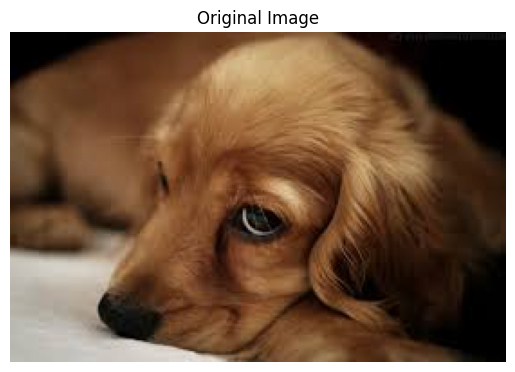

In [10]:
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR00sFxyRUpf6GApIevL-TGRzsXnHMdL5F_lA&s'
resp = urllib.request.urlopen(url)
img_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
# Decode the image data using cv2.imdecode
img = cv2.imdecode(img_array, cv2.IMREAD_COLOR) #The image is read in BGR format by default
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for proper display

#Show the original image
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')
plt.show()

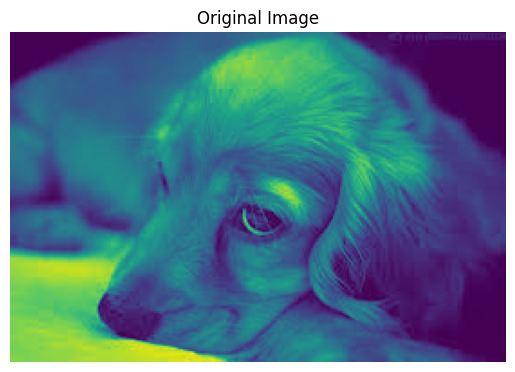

In [11]:
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR00sFxyRUpf6GApIevL-TGRzsXnHMdL5F_lA&s'
resp = urllib.request.urlopen(url)
img_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
img = cv2.imdecode(img_array, cv2.IMREAD_GRAYSCALE) # Convert to RGB for proper display

plt.imshow(img)
plt.title("Original Image")
plt.axis('off')
plt.show()

In [12]:
#Kernel
kernel = np.array([[1,1,1],
                   [1,2,1],
                   [1,1,1]], dtype=np.float32)
kernel = kernel / np.sum(kernel)

In [13]:
def apply_filter_manual(image, kernel):
    h, w = image.shape
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2


    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant') #Pad image
    output = np.zeros_like(image, dtype=np.float32)


    for i in range(h):
        for j in range(w):
            region = padded_image[i:i+kh, j:j+kw]
            output[i, j] = np.sum(region * kernel)  #Convolution operation

    return np.clip(output, 0, 255).astype(np.uint8)

manual_filtered = apply_filter_manual(img, kernel)

#Apply filter using OpenCV

In [14]:
opencv_filtered = cv2.filter2D(img, -1, kernel)

# Display the images

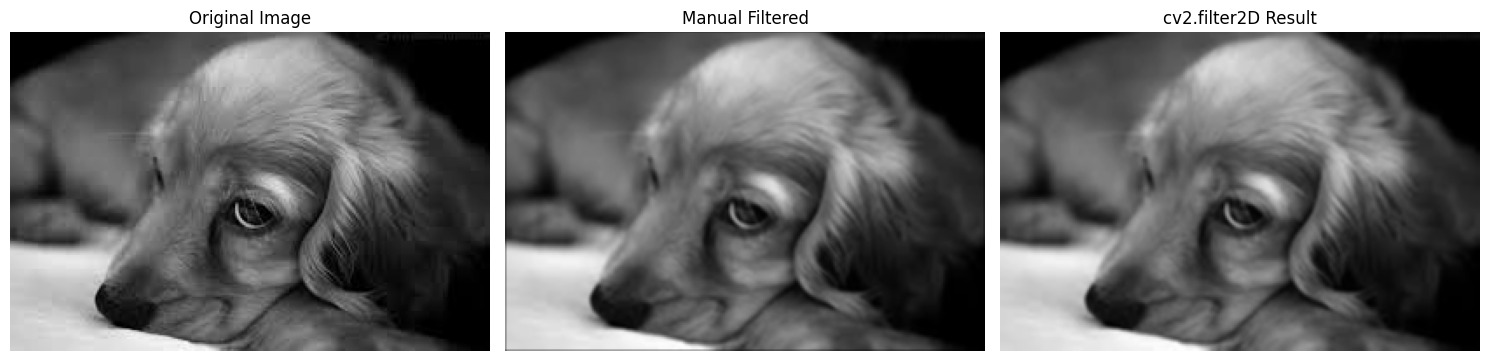

In [15]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Manual Filtered")
plt.imshow(manual_filtered, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("cv2.filter2D Result")
plt.imshow(opencv_filtered, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()